## All-Time Luck

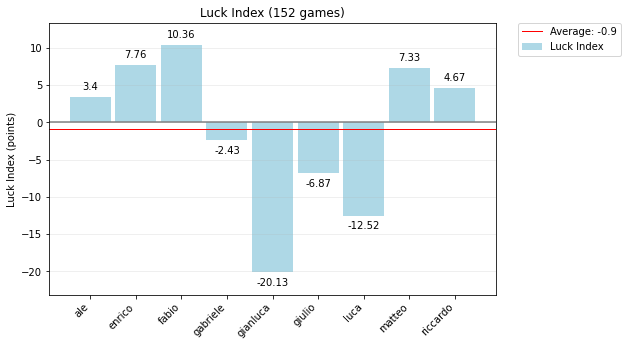

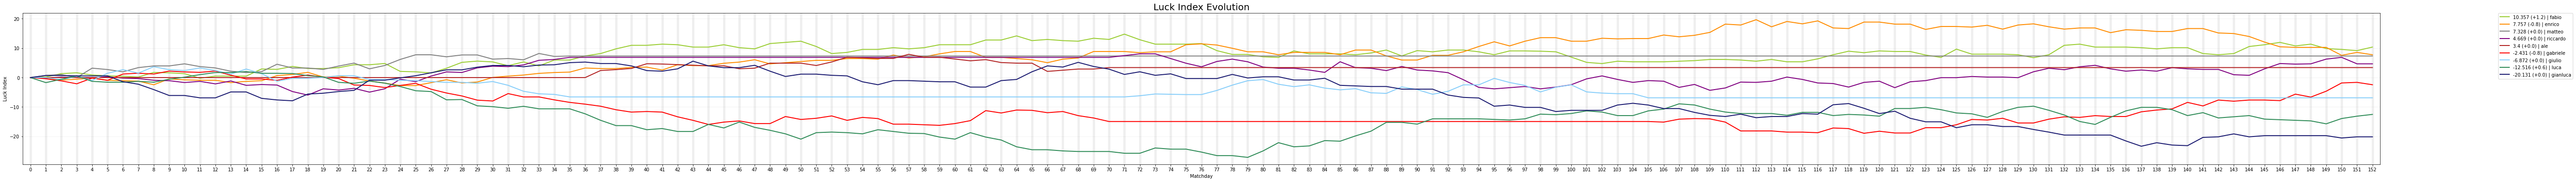

In [1]:
import all_time_luck
all_time_luck.all_time_luck()